# Testing scib metrics on fibroblasts seacells integration with scvi implementation of scib

In [1]:
import scanpy as sc
import pandas as pd
import scvi
from scib_metrics.benchmark import Benchmarker

Global seed set to 0


In [2]:
initDir = '/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration/metacells/fibroblasts/'

In [24]:
adata_list={'seacells_hdg_patients_batch_corr_scgen_celltypes_embeddings_2500.h5ad':'scGen_HVG',
            'seacells_hdg_patients_batch_corr_scgen_celltypes_embeddings_HDG.h5ad':'scGen_HDG',
            'seacells_hdg_patients_batch_corr_scVI_celltypes_embeddings_2500.h5ad':'scVI_HVG',
            'seacells_hdg_patients_batch_corr_scANVI_celltypes_embeddings_2500.h5ad':'scANVI_HVG',
            'seacells_hdg_patients_batch_corr_scVI_celltypes_embeddings_HDG.h5ad':'scVI_HDG',
            'seacells_hdg_patients_batch_corr_scANVI_celltypes_embeddings_HDG.h5ad':'scANVI_HDG'}

In [25]:
# Load the first AnnData object to store all embeddings
first_file = list(adata_list.keys())[0]
adata_first = sc.read(initDir + first_file)

In [26]:
# Function to get the correct embedding key based on the filename
def get_embedding_key(filename):
    if 'scgen' in filename.lower():
        return 'corrected_latent'
    elif 'scvi' in filename.lower():
        return 'X_scVI'
    elif 'scanvi' in filename.lower():
        return 'X_scANVI'
    else:
        raise ValueError(f"Unknown embedding type for file: {filename}")

In [27]:
# Iterate over each file, load the AnnData object, and extract the embeddings
for file, label in adata_list.items():
    adata = sc.read_h5ad(initDir + file)
    embedding_key = get_embedding_key(file)
    embeddings = adata.obsm[embedding_key]
    adata_first.obsm[label] = embeddings

In [28]:
adata_first

AnnData object with n_obs × n_vars = 6639 × 2500
    obs: 'ID', 'sample_name', 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'patient_id', 'dataset', 'cell_type', 'cell_subtype', 'sample_ID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK', 'cell_labels_ratio', 'max', 'assignment', 'leiden-1.8', 'SEACell', '# Single Cells', 'tissue-treatment', 'iCAF', 'mCAF', 'vCAF', 'starCAF', 'cell_types', '_scvi_batch', '_scvi_labels', 'S_score', 'G2M_score', 'phase'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_types_colors', 'dataset_colors', 'neighbors', 'paper_ID_colors', 'pca', 'phase_colors', 'tissue-treatment_colors', 'tissue_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'corrected_latent', 'latent', 'scGen_HVG', 'scGen_HDG', 'scVI_HVG', 'scANVI_HVG', 'scVI_HDG', 'scANVI_HDG'
    varm: 'PCs'
    obsp: 'c

In [29]:
bm = Benchmarker(
    adata_first,
    batch_key="paper_ID",
    label_key="cell_types",
    embedding_obsm_keys=['scGen_HVG', 'scGen_HDG', 'scVI_HVG', 'scANVI_HVG', 'scVI_HDG', 'scANVI_HDG'],
    n_jobs=-1,
)
bm.benchmark()

Embeddings:   0%|          | 0/6 [00:00<?, ?it/s]/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  17%|█▋        | 1/6 [00:24<02:03, 24.75s/it]/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  33%|███▎      | 2/6 [00:45<01:29, 22.32s/it]/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  50%|█████     | 3/6 [00:57<00:53, 17.88s/it]/home/

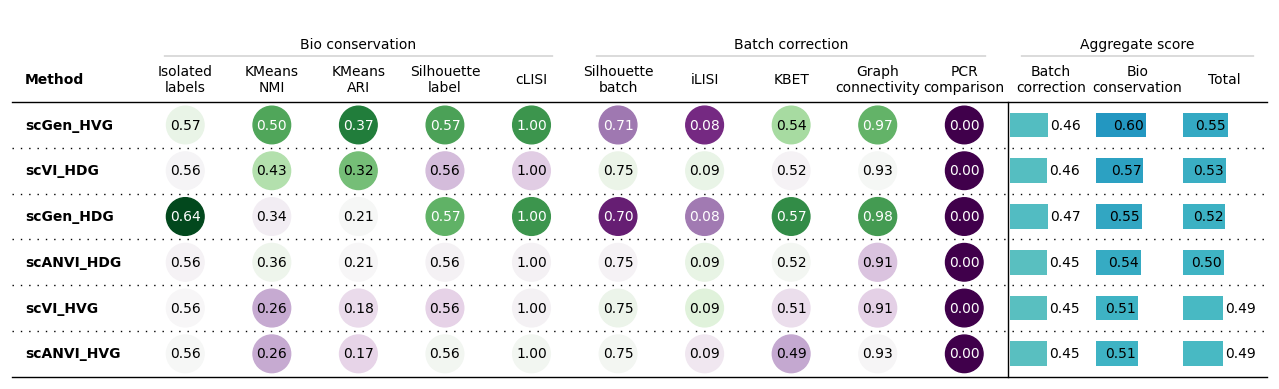

In [30]:
bm.plot_results_table(min_max_scale=False)

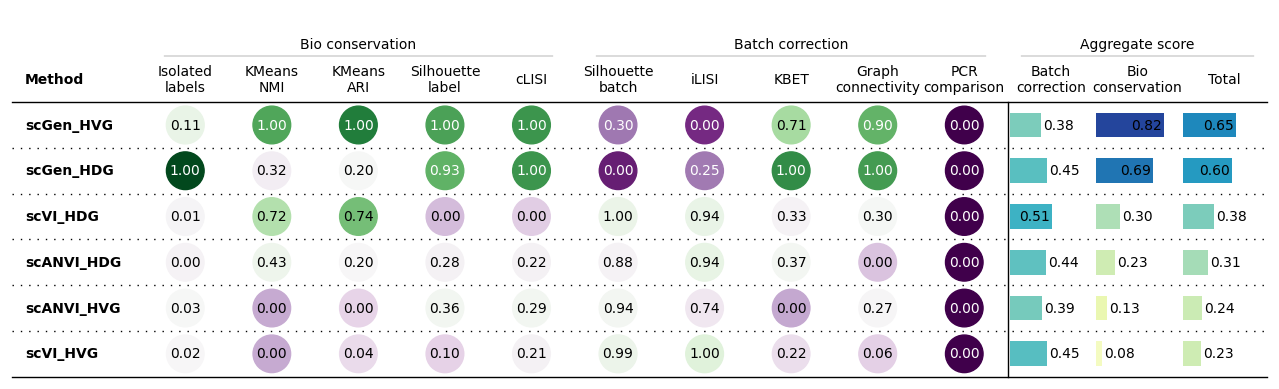

In [31]:
bm.plot_results_table(min_max_scale=True)

In [32]:
df = bm.get_results(min_max_scale=False)
print(df)

              Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                           
scGen_HVG            0.569329          0.496464           0.37324   
scGen_HDG            0.644774          0.335671          0.213642   
scVI_HVG             0.561921          0.259819          0.180312   
scANVI_HVG           0.562122          0.259007          0.173046   
scVI_HDG              0.56062          0.430729          0.321831   
scANVI_HDG            0.55982          0.361553          0.213515   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

             Silhouette label             cLISI  Silhouette batch  \
Embedding                                                           
scGen_HVG            0.572448               1.0          0.714002   
scGen_HDG            0.571404               1.0          0.696698   
scVI_HVG             0.558185          0.996439          0.752873   
scANVI_HVG           0.562283    

In [ ]:
adata_first.write_h5ad(initDir + 'seacells_fibroblasts_batch_corr_metrics.h5ad')